<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1> Projet paris sportif </h1></center>
<center><h2> bet-py </h2></center>
<center><h3> Évaluation des matchs </h3></center>
<hr style="border-width:2px;border-color:#75DFC1">


# Introduction



> Plan du <i>notebook</i>
>> I - [Analyse des différents évévements et actions associées](#analyse)
>>
>>
>> II - [Étude d'un match en particulier](#étude)
>>
>>

In [1]:
## Importation des modules
import os
import warnings

import datetime          as dt
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

In [2]:
## Chargement des tables
os.chdir(r'D:\Users\User\Documents\Works\03 - Formations\02 - DataScientest\06 - Project\00 - Data\Football')

match_event = pd.read_csv('match_event.csv').sort_values(['match_id', 'matchperiod', 'eventsec'])
player      = pd.read_csv('player.csv', index_col='id')

In [3]:
## Récupération du poste de chaque joueur dans la table « match_event » depuis la table « player »
match_event = match_event.join(player['position'], on='players_id')

In [27]:
## Affichage des premières lignes
match_event.head()

,id,club_id,match_id,players_id,matchperiod,eventsec,eventname,action,modifier,x_begin,y_begin,x_end,y_end,is_success,position
913471,640782,53,0,197,1H,2.417590,Pass,Simple pass,NaN,49,50,38.0,58.0,t,Midfielder
1027989,640783,53,0,1359,1H,3.904412,Pass,Simple pass,NaN,38,58,37.0,91.0,t,Midfielder
905000,640784,53,0,2207,1H,6.484211,Pass,Simple pass,NaN,37,91,34.0,72.0,t,Defender
989323,640785,53,0,631,1H,10.043835,Pass,Simple pass,NaN,34,72,36.0,14.0,t,Defender
913472,640786,53,0,1620,1H,14.032070,Pass,Simple pass,NaN,36,14,30.0,39.0,t,Defender


In [4]:
## Recherche du plus petit événement pour étude (id == 985)
tiniest_match_id = match_event.groupby(by='match_id').size().argmin()

## Récupération des événements
tiniest_match_event = match_event[match_event.match_id == tiniest_match_id]

In [29]:
# Affichage des premières lignes
tiniest_match_event.head(10)

,id,club_id,match_id,players_id,matchperiod,eventsec,eventname,action,modifier,x_begin,y_begin,x_end,y_end,is_success,position
2388562,2182590,59,985,311,1H,2.128856,Pass,Simple pass,NaN,50,51,44.0,51.0,t,Forward
2270363,2182591,59,985,1314,1H,3.002507,Pass,Simple pass,NaN,44,51,36.0,21.0,t,Midfielder
2432461,2182592,59,985,389,1H,7.444523,Pass,Simple pass,NaN,36,21,28.0,60.0,t,Midfielder
2101120,2182593,59,985,403,1H,11.951888,Pass,Simple pass,NaN,28,60,31.0,85.0,t,Defender
2388563,2182594,59,985,216,1H,14.070343,Pass,Simple pass,NaN,31,85,24.0,54.0,t,Defender
2270364,2182595,59,985,403,1H,17.832804,Pass,Simple pass,NaN,24,54,29.0,11.0,t,Defender
2432462,2182596,59,985,257,1H,20.337699,Pass,Simple pass,NaN,29,11,44.0,11.0,t,Midfielder
1251743,2182597,6,985,1242,1H,22.014833,Duel,Ground loose ball duel,lost,56,89,61.0,76.0,f,Forward
2101121,2182599,59,985,389,1H,22.512077,Pass,Simple pass,NaN,39,24,43.0,51.0,t,Midfielder
2388564,2182600,59,985,1460,1H,24.068216,Pass,Simple pass,NaN,43,51,43.0,29.0,t,Midfielder


In [5]:
## Création d'une fonction pour affichage de la distribution des actions
def Distribution(action, dico_action, df_all, df_one):
    """
    """
    ## Distribution des « actions » sur tous les matchs
    card_action = len(df_all[df_all.eventname == action])
    distribution_action_all = df_all[df_all.eventname == action].groupby(by='action').size().reset_index(name='pourcentage').set_index('action').apply(lambda x: round(x / card_action * 100., 2))

    ## Distribution des « actions » sur le match étudié
    card_action = len(df_one[df_one.eventname == action])
    distribution_action_one = df_one[df_one.eventname == action].groupby(by='action').size().reset_index(name='pourcentage').set_index('action').apply(lambda x: round(x / card_action * 100., 2))

    ## Graphiques
    fig = plt.figure(figsize=(20, 15))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    ax1.barh([dico_action[v] for v in distribution_action_all.index], distribution_action_all.pourcentage)
    ax2.barh([dico_action[v] for v in distribution_action_one.index], distribution_action_one.pourcentage)

    for ax, distrib in zip([ax1, ax2], [distribution_action_all.pourcentage, distribution_action_one.pourcentage]):
        ax.set_xlim(0, 100)
        ax.set_xlabel('Pourcentage (%)')

        for i, v in enumerate(distrib):
            ax.text(v + .25, i, "{:.2f} %".format(v))

    ax1.set_ylabel('Action')
    ax1.set_title("Distribution des types de « " + action + " » sur l'ensemble des matches")
    ax2.set_title("Distribution des types de « " + action + " » sur le match étudié");

# <a name="analyse"></a> I - Analyse des différents évévements et actions associées

> a. [Distribution des événements](#distribution_évéments)
> 
> b. [Distribution des actions de type « Passe »](#distribution_passes)
> 
> c. [Distribution des actions de type « Duel »](#distribution_duels)
> 
> d. [Distribution des actions de type « Action autre »](#distribution_autres)
> 
> e. [Distribution des actions de type « Tir »](#distribution_tirs)
> 
> f. [Distribution des actions de type « Coup franc »](#distribution_coups)
> 
> g. [Distribution des actions de type « Faute »](#distribution_fautes)
> 
> h. [Distribution des actions de type « Arrêt »](#distribution_arrêts)
> 
> i. [Distribution des actions de type « Hors-jeu »](#distribution_hors-jeu)
> 
> j. [Distribution des actions de type « Sortie du gardien »](#distribution_sorties)
> 
> k. [Distribution des actions de type « Interruption »](#distribution_interruptions)
> 

<table>
    <caption>Tableau représentant les différents événements possibles et leurs actions associées</caption>
    <thead>
        <tr>
            <td> Événement </td>
            <td> Passe </td>
            <td> Duel </td>
            <td> Action autre </td>
            <td> Tir </td>
            <td> Coup franc </td>
            <td> Faute </td>
            <td> Arrêt </td>
            <td> Hors-jeu </td>
            <td> Sortie du gardien </td>
            <td> Interruption </td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan='8'> Action </td>
            <td> Passe simple </td>
            <td> Duel attaque au sol </td>
            <td> Contact </td>
            <td> Tir </td>
            <td> Tir du gardien </td>
            <td> Faute </td>
            <td> Arrêt réflexe </td>
            <td> </td>
            <td> Sortie du gardien </td>
            <td> Coup de siflet </td>
        </tr>
        <tr>
            <td> Passe haute </td>
            <td> Duel défense au sol </td>
            <td> Accélération </td>
            <td> </td>
            <td> Coup de coin </td>
            <td> Temps perdu sur faute </td>
            <td> Tentative d'arrêt </td>
            <td> </td>
            <td> </td>
            <td> Ballon en dehors des limites du terrain </td>
        </tr>
        <tr>
            <td> Lancer </td>
            <td> Duel perte de balle </td>
            <td> Dégagement </td>
            <td> </td>
            <td> Touche </td>
            <td> Faute en dehors du terrain </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> </td>
        </tr>
        <tr>
            <td> Passe intelligente </td>
            <td> Duel aérien </td>
            <td> </td>
            <td> </td>
            <td> Coup franc </td>
            <td> Faute de main </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> </td>
        </tr>
        <tr>
            <td> Passe croisée </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> Tir de coup franc </td>
            <td> Carton en retard </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> </td>
        </tr>
        <tr>
            <td> Passe de la tête </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> Coup franc croisé </td>
            <td> Protestation </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> </td>
        </tr>
        <tr>
            <td> Passe à la main </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> Pénalty </td>
            <td> Simulation </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> </td>
        </tr>
        <tr>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> Faute violente </td>
            <td> </td>
            <td> </td>
            <td> </td>
            <td> </td>
        </tr>
    </tbody>
</table>

## <a name="distribution_évéments"></a> I - a. Distribution des événements

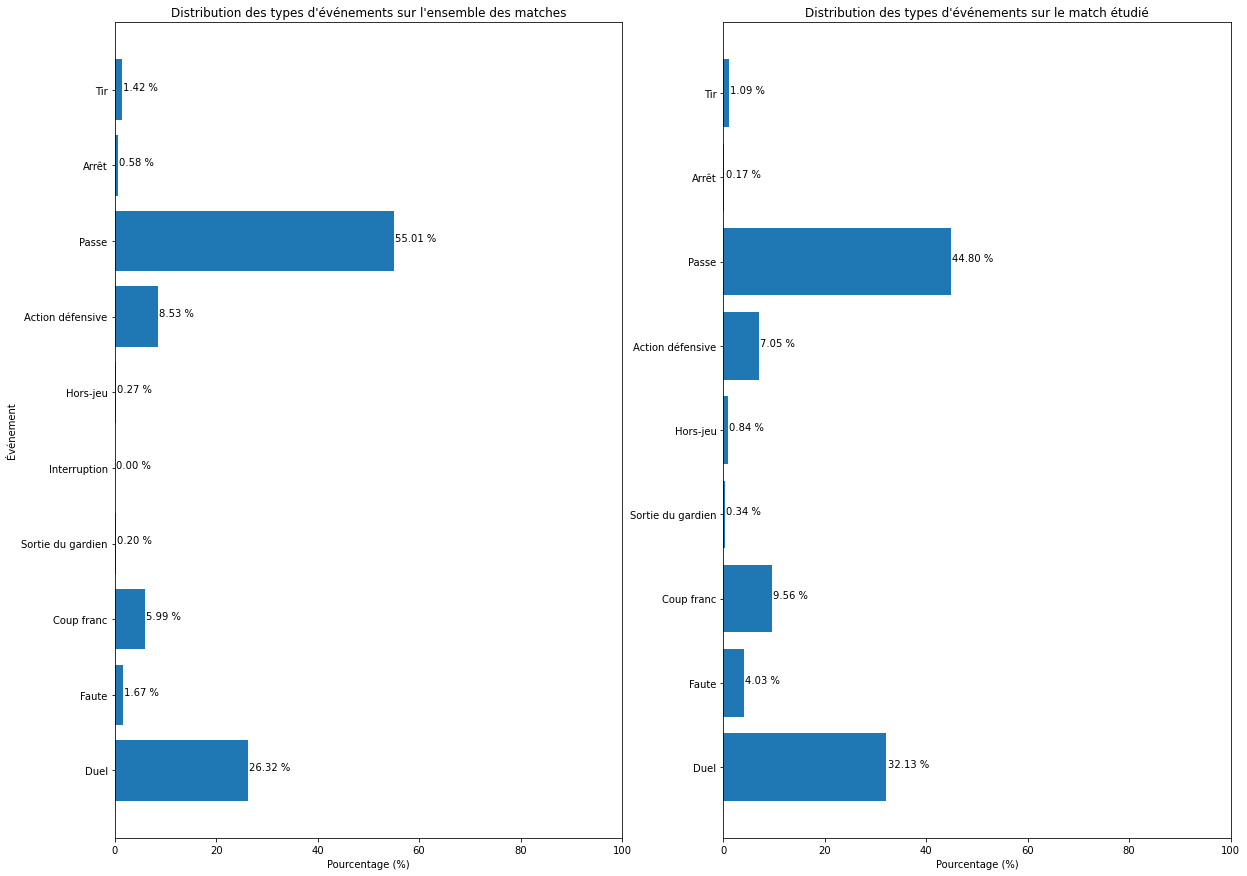

In [10]:
## Listage des différents événements possibles
# print(match_event.eventname.dropna().unique())
dico_event                            = {}
dico_event['Pass']                    = 'Passe'
dico_event['Duel']                    = 'Duel'
dico_event['Others on the ball']      = 'Action défensive'
dico_event['Shot']                    = 'Tir'
dico_event['Free Kick']               = 'Coup franc'
dico_event['Foul']                    = 'Faute'
dico_event['Save attempt']            = 'Arrêt'
dico_event['Offside']                 = 'Hors-jeu'
dico_event['Goalkeeper leaving line'] = 'Sortie du gardien'
dico_event['Interruption']            = 'Interruption'

## Distribution des « événements » sur tous les matchs
distribution_event_all = match_event.groupby(by='eventname').size().reset_index(name='pourcentage').set_index('eventname').apply(lambda x: round(x / len(match_event) * 100., 2))

## Distribution des « événements » sur le match étudié
distribution_event_one = tiniest_match_event.groupby(by='eventname').size().reset_index(name='pourcentage').set_index('eventname').apply(lambda x: round(x / len(tiniest_match_event) * 100., 2))

## Graphiques
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.barh([dico_event[v] for v in distribution_event_all.index], distribution_event_all.pourcentage)
ax2.barh([dico_event[v] for v in distribution_event_one.index], distribution_event_one.pourcentage)

for ax, distrib in zip([ax1, ax2], [distribution_event_all.pourcentage, distribution_event_one.pourcentage]):
    ax.set_xlim(0, 100)
    ax.set_xlabel('Pourcentage (%)')
    
    for i, v in enumerate(distrib):
        ax.text(v + .25, i, "{:.2f} %".format(v))

ax1.set_ylabel('Événement')
ax1.set_title("Distribution des types d'événements sur l'ensemble des matches")
ax2.set_title("Distribution des types d'événements sur le match étudié");

## <a name="distribution_passes"></a> I - b. Distribution des actions de type « Passe »

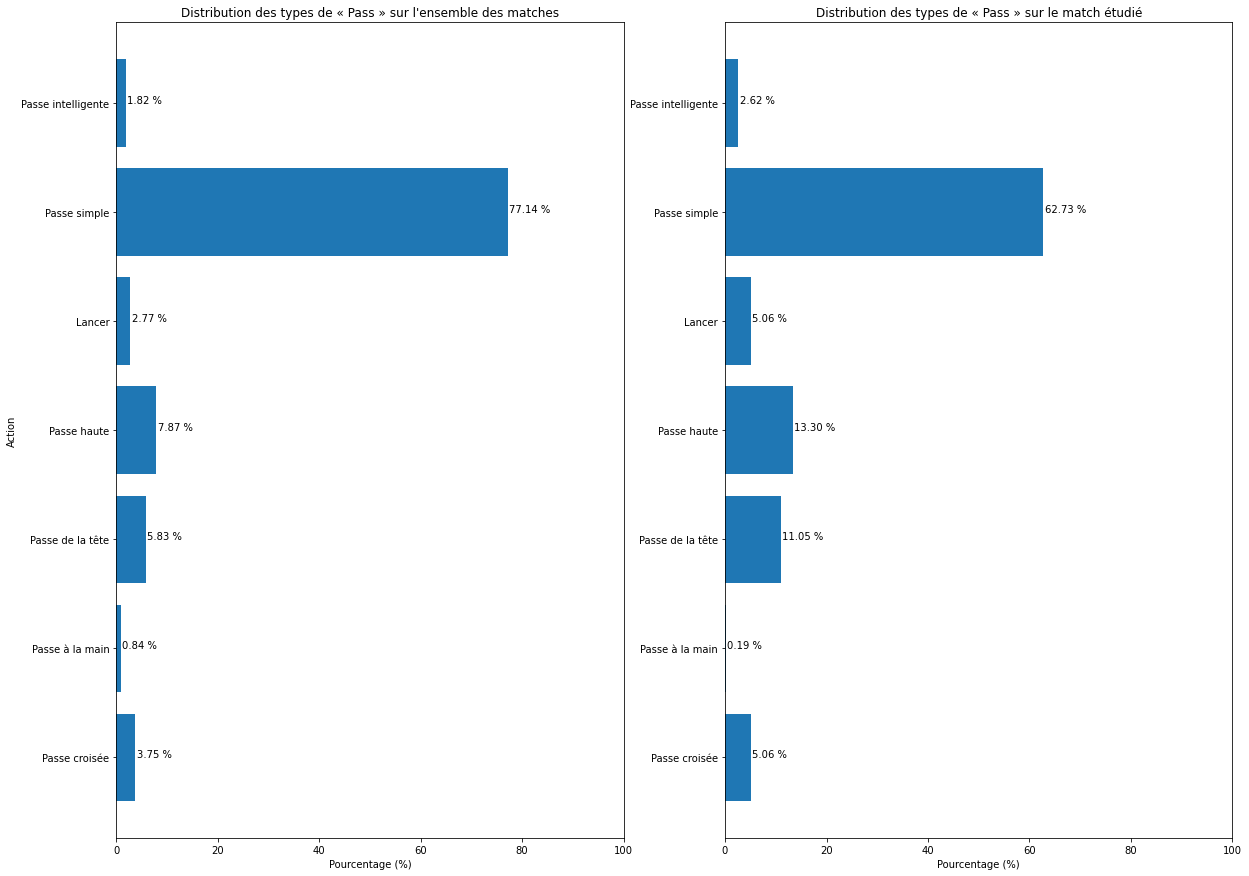

In [8]:
## Évaluation des « passes » ('Pass')

## Liste des actions possibles pour ce type d'événement
# print(match_event[match_event.eventname == 'Pass'].action.dropna().unique())
dico_pass                = {}
dico_pass['Simple pass'] = 'Passe simple'
dico_pass['High pass']   = 'Passe haute'
dico_pass['Launch']      = 'Lancer'
dico_pass['Smart pass']  = 'Passe intelligente'
dico_pass['Cross']       = 'Passe croisée'
dico_pass['Head pass']   = 'Passe de la tête'
dico_pass['Hand pass']   = 'Passe à la main'

## Affichage de la distribution
Distribution('Pass', dico_pass, match_event, tiniest_match_event)

## <a name="distribution_duels"></a> I - c. Distribution des actions de type « Duel »

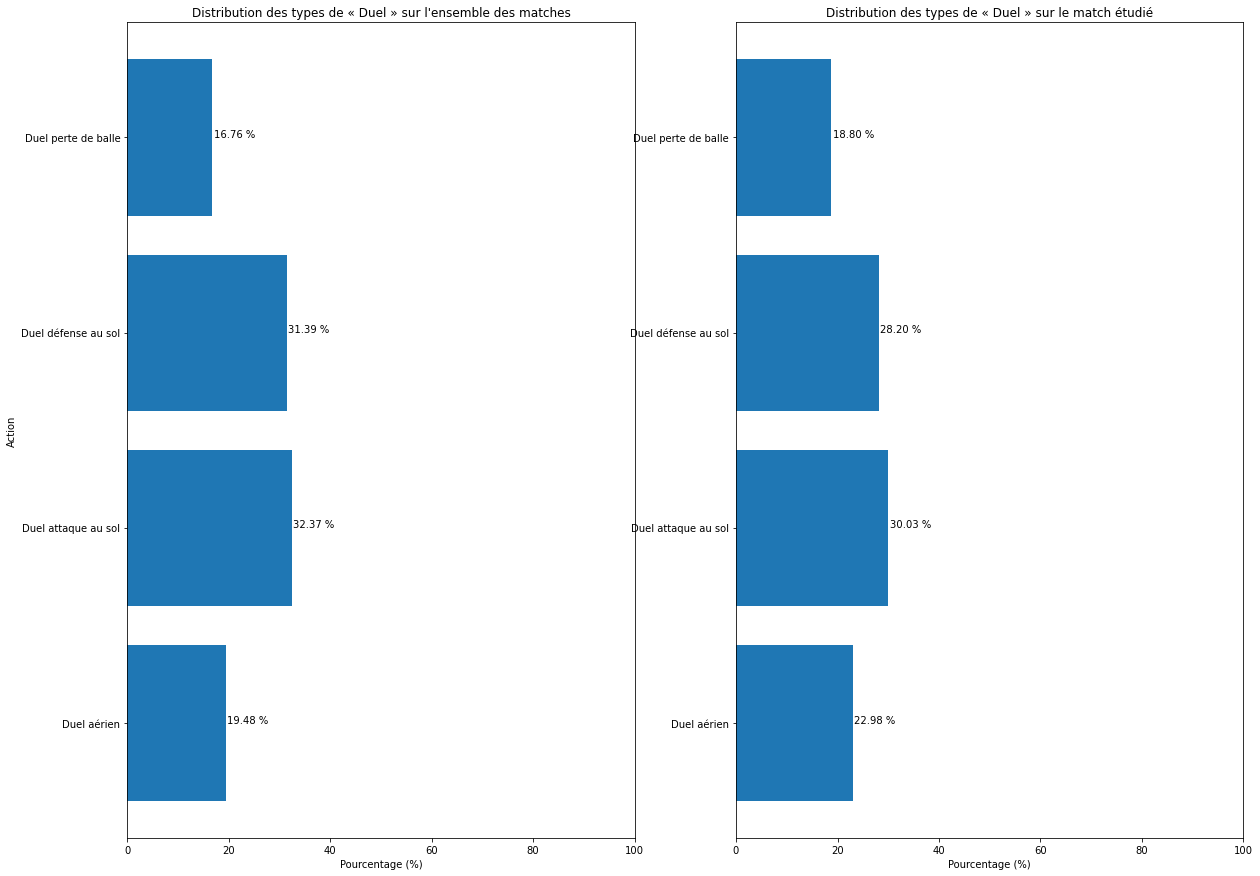

In [9]:
## Évaluation des « duels » ('Duel')

## Liste des actions possibles pour ce type d'événement
# print(match_event[match_event.eventname == 'Duel'].action.dropna().unique())
dico_duel                           = {}
dico_duel['Ground attacking duel']  = 'Duel attaque au sol'
dico_duel['Ground defending duel']  = 'Duel défense au sol'
dico_duel['Ground loose ball duel'] = 'Duel perte de balle'
dico_duel['Air duel']               = 'Duel aérien'

## Affichage de la distribution
Distribution('Duel', dico_duel, match_event, tiniest_match_event)

## <a name="distribution_autres"></a> I - d. Distribution des actions de type « Action autre »

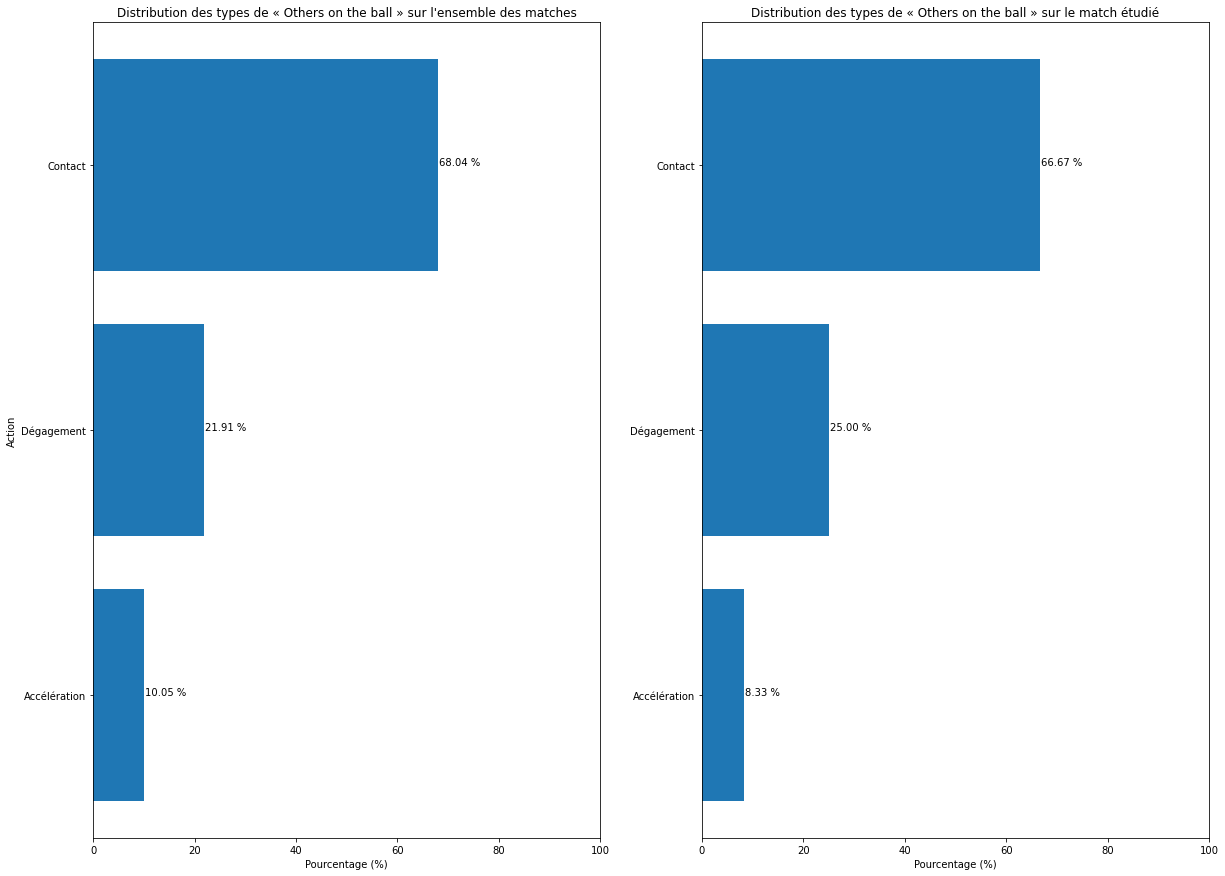

In [10]:
## Évaluation des « actions autres » ('Others on the ball')

## Liste des actions possibles pour ce type d'événement
# print(match_event[match_event.eventname == 'Others on the ball'].action.dropna().unique())
dico_others                 = {}
dico_others['Touch']        = 'Contact'
dico_others['Acceleration'] = 'Accélération'
dico_others['Clearance']    = 'Dégagement'

## Affichage de la distribution
Distribution('Others on the ball', dico_others, match_event, tiniest_match_event)

## <a name="distribution_tirs"></a> I - e. Distribution des actions de type « Tir »

In [13]:
## Évaluation des « tirs » ('Shot')

## Liste des actions possibles pour ce type d'événement
print(match_event[match_event.eventname == 'Shot'].action.dropna().unique())

['Shot']


## <a name="distribution_coups"></a> I - f. Distribution des actions de type « Coup franc »

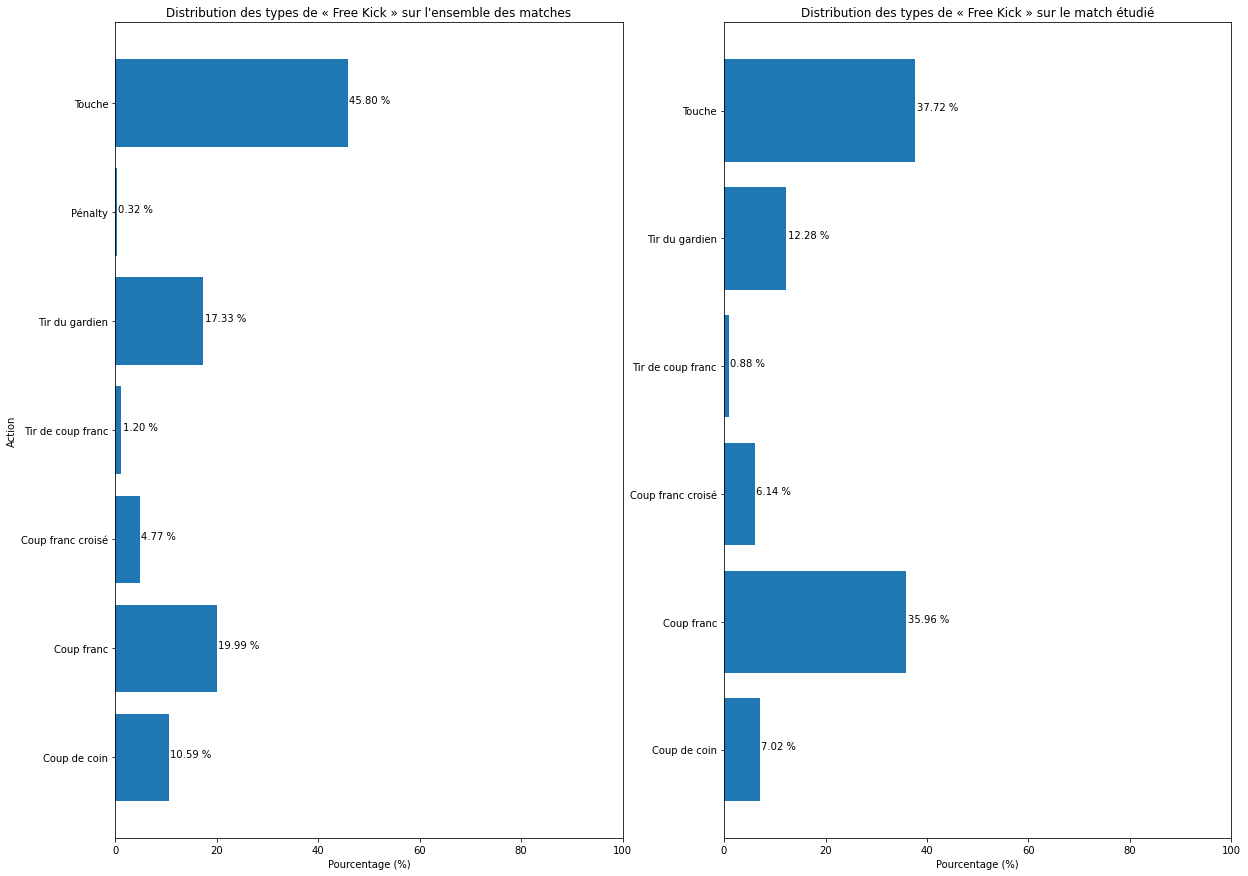

In [11]:
## Évaluation des « coups francs » ('Free Kick')

## Liste des actions possibles pour ce type d'événement
# print(match_event[match_event.eventname == 'Free Kick'].action.dropna().unique())
dico_kick                    = {}
dico_kick['Goal kick']       = 'Tir du gardien'
dico_kick['Corner']          = 'Coup de coin'
dico_kick['Throw in']        = 'Touche'
dico_kick['Free Kick']       = 'Coup franc'
dico_kick['Free kick shot']  = 'Tir de coup franc'
dico_kick['Free kick cross'] = 'Coup franc croisé'
dico_kick['Penalty']         = 'Pénalty'

## Affichage de la distribution
Distribution('Free Kick', dico_kick, match_event, tiniest_match_event)

## <a name="distribution_fautes"></a> I - g. Distribution des actions de type « Faute »

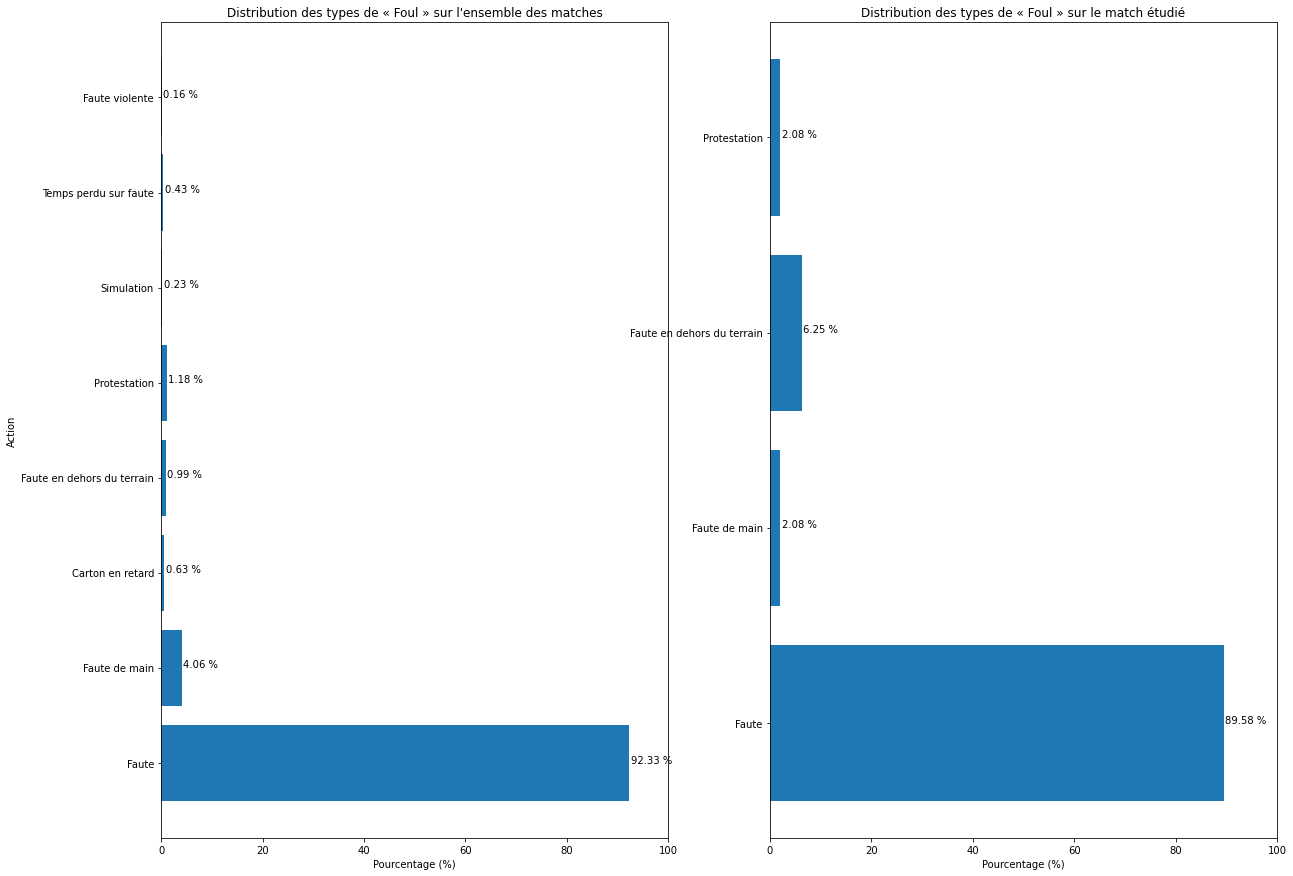

In [89]:
## Évaluation des « fautes » ('Foul')

## Liste des actions possibles pour ce type d'événement
# print(match_event[match_event.eventname == 'Foul'].action.dropna().unique())
dico_foul                     = {}
dico_foul['Foul']             = 'Faute'
dico_foul['Time lost foul']   = 'Temps perdu sur faute'
dico_foul['Out of game foul'] = 'Faute en dehors du terrain'
dico_foul['Hand foul']        = 'Faute de main'
dico_foul['Late card foul']   = 'Carton en retard'
dico_foul['Protest']          = 'Protestation'
dico_foul['Simulation']       = 'Simulation'
dico_foul['Violent Foul']     = 'Faute violente'

## Affichage de la distribution
Distribution('Foul', dico_foul, match_event, tiniest_match_event)

## <a name="distribution_arrêts"></a> I - h. Distribution des actions de type « Arrêt »

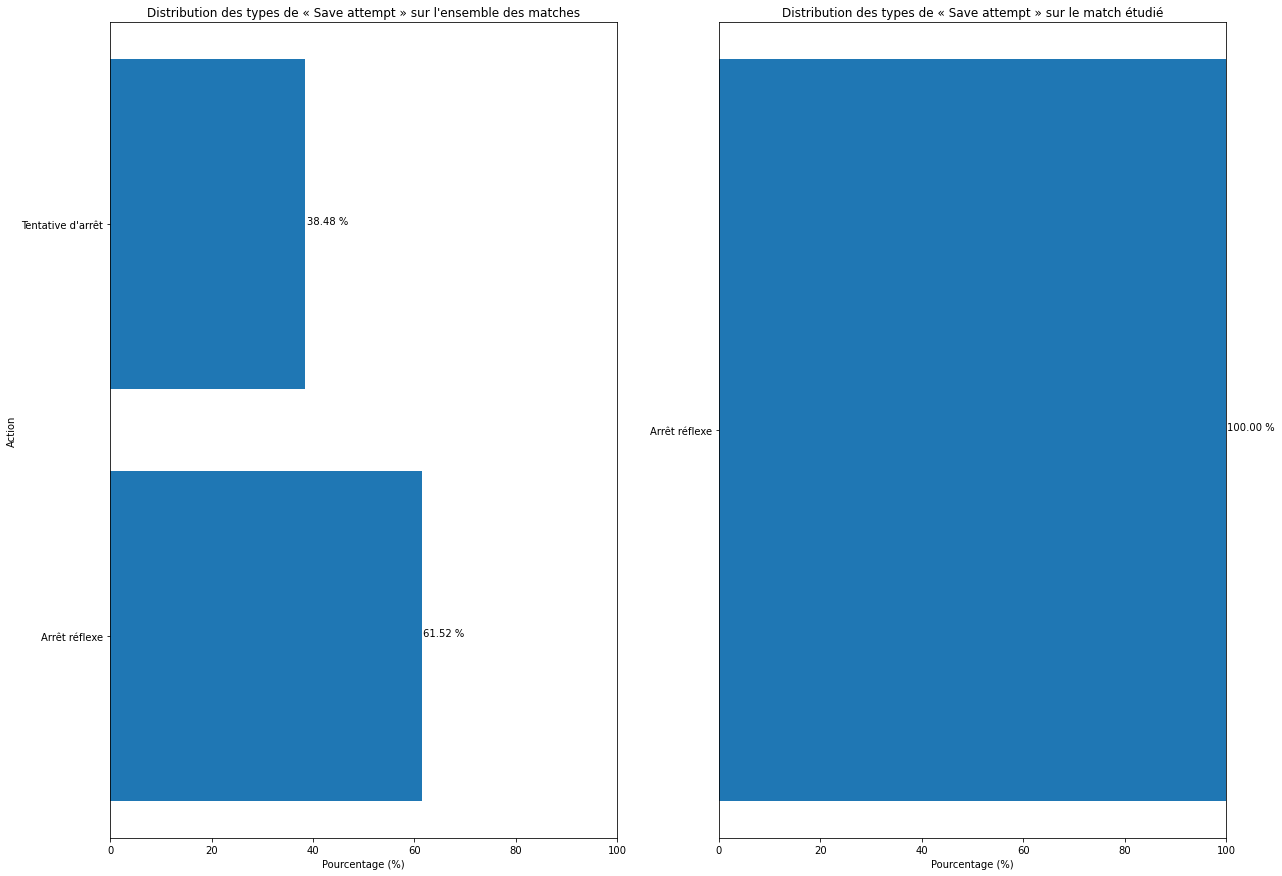

In [12]:
## Évaluation des « arrêts » ('Save attempt')

## Liste des actions possibles pour ce type d'événement
# print(match_event[match_event.eventname == 'Save attempt'].action.dropna().unique())
dico_save                 = {}
dico_save['Reflexes']     = 'Arrêt réflexe'
dico_save['Save attempt'] = "Tentative d'arrêt"

## Affichage de la distribution
Distribution('Save attempt', dico_save, match_event, tiniest_match_event)

## <a name="distribution_hors-jeu"></a> I - i. Distribution des actions de type « Hors-jeu »

In [101]:
## Évaluation des « hors-jeu » ('Offside')

## Liste des actions possibles pour ce type d'événement
print(match_event[match_event.eventname == 'Offside'].action.dropna().unique())

[]


## <a name="distribution_sorties"></a> I - j. Distribution des actions de type « Sortie du gardien »

In [102]:
## Évaluation des « sorties du gardien » ('Goalkeeper leaving line')

## Liste des actions possibles pour ce type d'événement
print(match_event[match_event.eventname == 'Goalkeeper leaving line'].action.dropna().unique())

['Goalkeeper leaving line']


## <a name="distribution_interruptions"></a> I - k. Distribution des actions de type « Interruption »

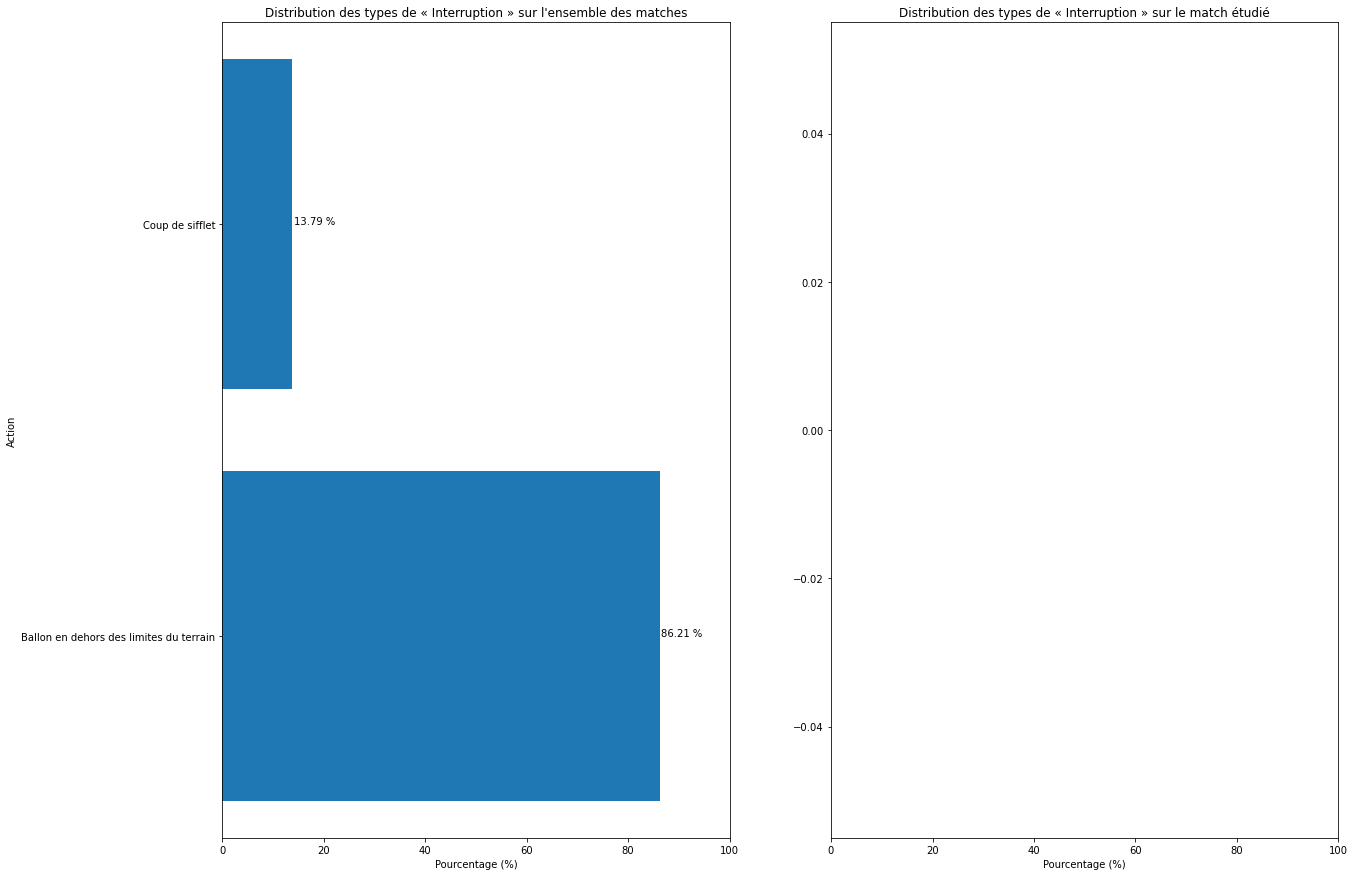

In [105]:
## Évaluation des « interruptions » ('Interruption')

## Liste des actions possibles pour ce type d'événement
# print(match_event[match_event.eventname == 'Interruption'].action.dropna().unique())
dico_inter                          = {}
dico_inter['Whistle']               = 'Coup de sifflet'
dico_inter['Ball out of the field'] = 'Ballon en dehors des limites du terrain'

## Affichage de la distribution
Distribution('Interruption', dico_inter, match_event, tiniest_match_event)

# <a name="étude"></a> II - Étude d'un match en particulier

> a. [Occupation du terrain](#étude_occupation)
> 
> b. [Équipe démarrant la mi-temps](#étude_lancement)
> 
> c. [Possession du ballon](#étude_possession)
> 
> d. [Statistiques par joueur](#étude_stats)
> 
> e. [Statistiques globales au niveau poste](#étude_stats_postes)
> 
> f. [Statistiques globales au niveau équipe](#étude_stats_équipe)
> 

In [30]:
tiniest_match_event.head()

,id,club_id,match_id,players_id,matchperiod,eventsec,eventname,action,modifier,x_begin,y_begin,x_end,y_end,is_success,position
2388562,2182590,59,985,311,1H,2.128856,Pass,Simple pass,NaN,50,51,44.0,51.0,t,Forward
2270363,2182591,59,985,1314,1H,3.002507,Pass,Simple pass,NaN,44,51,36.0,21.0,t,Midfielder
2432461,2182592,59,985,389,1H,7.444523,Pass,Simple pass,NaN,36,21,28.0,60.0,t,Midfielder
2101120,2182593,59,985,403,1H,11.951888,Pass,Simple pass,NaN,28,60,31.0,85.0,t,Defender
2388563,2182594,59,985,216,1H,14.070343,Pass,Simple pass,NaN,31,85,24.0,54.0,t,Defender


In [11]:
tiniest_match_event.isna().sum() / len(tiniest_match_event)

id             0.000000
club_id        0.000000
match_id       0.000000
players_id     0.000000
matchperiod    0.000000
eventsec       0.000000
eventname      0.000000
action         0.008389
modifier       0.541946
x_begin        0.000000
y_begin        0.000000
x_end          0.000839
y_end          0.000839
is_success     0.110738
position       0.000000
dtype: float64

In [8]:
tiniest_match_event.modifier.unique()

array([nan, 'lost', 'won', 'neutral', 'blocked', 'interception',
       'through', 'Right', 'high', 'gl', 'missed ball', 'or', 'obr',
       'yellow_card', 'olb', 'Left', 'counter_attack', 'pr', 'fairplay',
       'otr', 'keyPass', 'otl', 'opportunity'], dtype=object)

## <a name="étude_occupation"></a> II - a. Occupation du terrain

> Problème à régler pour cette partie :
>  - correction des dimensions aberrantes (dimension du terrain : \[0 : 100\] x \[0 : 100\]) ;
>  - déterminer la partie du terrain de chaque équipe (voir position des gardiens ; absence de matchs nuls donc gardiens actifs à au moins un moment).

In [9]:
# Dimension de tous les terrains
x_min = min(match_event.x_begin.min(), match_event.x_end.min())
x_max = max(match_event.x_begin.max(), match_event.x_end.max())
y_min = min(match_event.y_begin.min(), match_event.y_end.min())
y_max = max(match_event.y_begin.max(), match_event.y_end.max())

print('Longueur : {} x {}'.format(x_min, x_max))
print('Largeur : {} x {}'.format(y_min, y_max))

# Des redimensionnements à prévoir !
print("Nombre d'erreurs en abscisse : ", match_event[match_event.x_begin < 0.].x_begin.count())
print("Nombre d'erreurs en ordonnée : ", match_event[match_event.y_end > 100.].y_end.count())

# Lignes en erreurs
match_event[(match_event.x_begin < 0.) | (match_event.y_end > 100.)].head()

Longueur : -1 x 100
Largeur : 0 x 101
Nombre d'erreurs en abscisse :  1
Nombre d'erreurs en ordonnée :  1


,id,club_id,match_id,players_id,matchperiod,eventsec,eventname,action,modifier,x_begin,y_begin,x_end,y_end,is_success
46163,140843,51,291,131,2H,2753.190257,Others on the ball,Touch,NaN,-1,47,69.0,12.0,NaN
2775860,2858103,43,1640,1107,1H,1656.908892,Pass,High pass,NaN,14,50,28.0,101.0,t


In [10]:
# Dimension du terrain
x_min = min(tiniest_match_event.x_begin.min(), tiniest_match_event.x_end.min())
x_max = max(tiniest_match_event.x_begin.max(), tiniest_match_event.x_end.max())
y_min = min(tiniest_match_event.y_begin.min(), tiniest_match_event.y_end.min())
y_max = max(tiniest_match_event.y_begin.max(), tiniest_match_event.y_end.max())

print('Longueur : {} x {}'.format(x_min, x_max))
print('Largeur : {} x {}'.format(y_min, y_max))

Longueur : 0 x 100
Largeur : 0 x 100


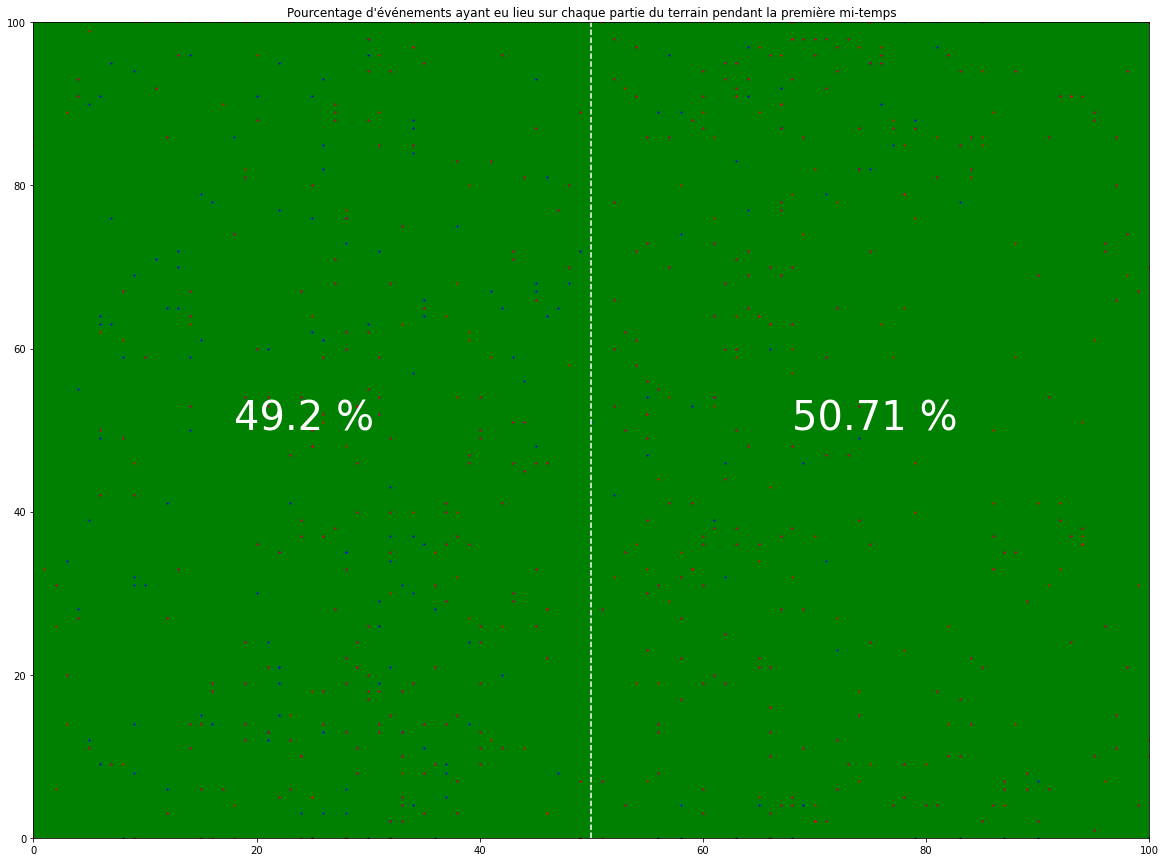

In [55]:
# Pourcentage d'événements ayant eu lieu sur chaque partie du terrain pendant la première mi-temps
tiniest_match_event_1H = tiniest_match_event[tiniest_match_event.matchperiod == '1H']

occ_A = tiniest_match_event_1H[tiniest_match_event_1H.x_begin < 50.].x_begin.count() + tiniest_match_event_1H[tiniest_match_event_1H.x_end < 50.].x_end.count()
occ_B = tiniest_match_event_1H[tiniest_match_event_1H.x_begin > 50.].x_begin.count() + tiniest_match_event_1H[tiniest_match_event_1H.x_end > 50.].x_end.count()

occ_TOT = 2 * tiniest_match_event_1H.x_begin.count()

occ_A = round(occ_A / occ_TOT * 100., 2)
occ_B = round(occ_B / occ_TOT * 100., 2)

# Affichage
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(1, 1, 1)

ax.set_facecolor('green')
ax.set_xlim([0, 100])
ax.set_ylim([0, 100])
ax.scatter(tiniest_match_event_1H.x_begin, tiniest_match_event_1H.y_begin, color='blue', s=1)
ax.scatter(tiniest_match_event_1H.x_end, tiniest_match_event_1H.y_end, color='red', s=1)

ax.plot([50, 50], [0, 100], color='white', linestyle='--') # Ligne centrale

ax.text(18, 50, '{} %'.format(occ_A), fontsize=40, color='white')
ax.text(68, 50, '{} %'.format(occ_B), fontsize=40, color='white')

ax.set_title("Pourcentage d'événements ayant eu lieu sur chaque partie du terrain pendant la première mi-temps");

In [115]:
def EventsDistributionOnField(data, bins=10, text=True):
    """
    """
    # Récupération des abscisses
    data = list(data.x_begin) + list(data.x_end)
    data.sort()

    # Affichage
    plt.figure(figsize=(20, 15))
    arr = plt.hist(data, bins=bins, color='green')
    
    # Ajout de la valeur de chaque barre
    if text:
        for i in range(bins):
            plt.text(arr[1][i] + 100 / (2 * bins), arr[0][i] - 5., str(int(arr[0][i])), size=15, color='white')

    # Ajout de la ligne centrale + redimensionnement du graphique
    max_value = max([arr[0][i] for i in range(bins)])
    plt.plot([50, 50], [0, max_value], color='red', linestyle='--')
    plt.xlim([0, 100])
    plt.ylim([0, max_value])

    plt.title("Nombre d'événements par tranche de terrain ({} tranches égales)".format(bins));

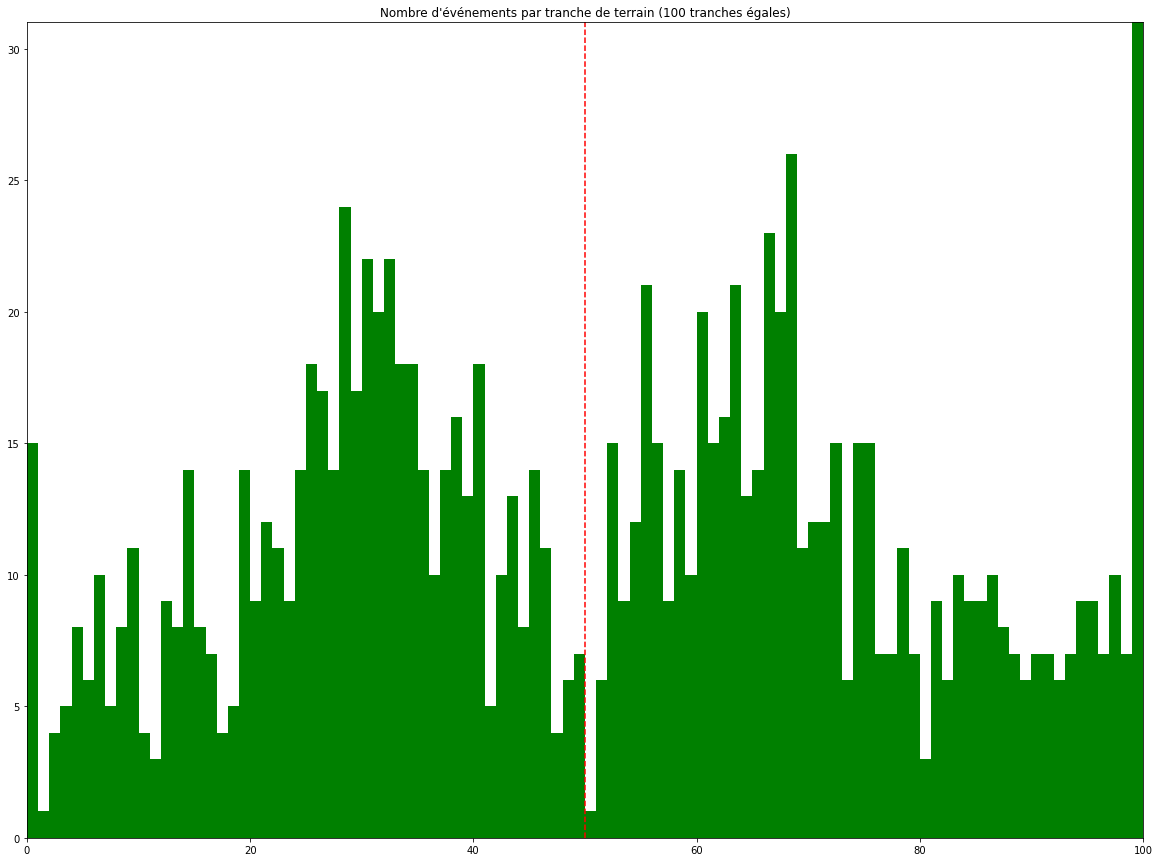

In [116]:
# Distribution des événements sur le terrain pendant la 1re période
EventsDistributionOnField(tiniest_match_event[tiniest_match_event.matchperiod == '1H'], bins=100, text=False)

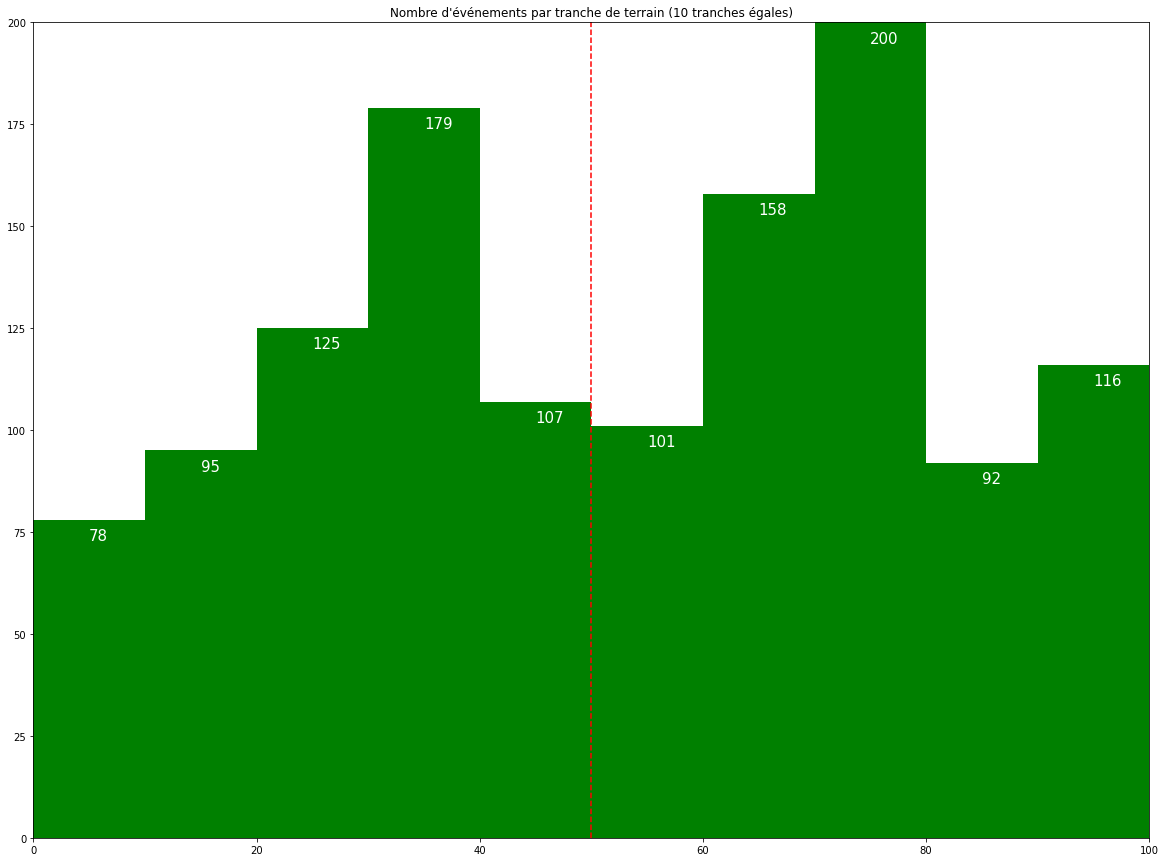

In [117]:
# Distribution des événements sur le terrain pendant la 2e période
EventsDistributionOnField(tiniest_match_event[tiniest_match_event.matchperiod == '2H'])

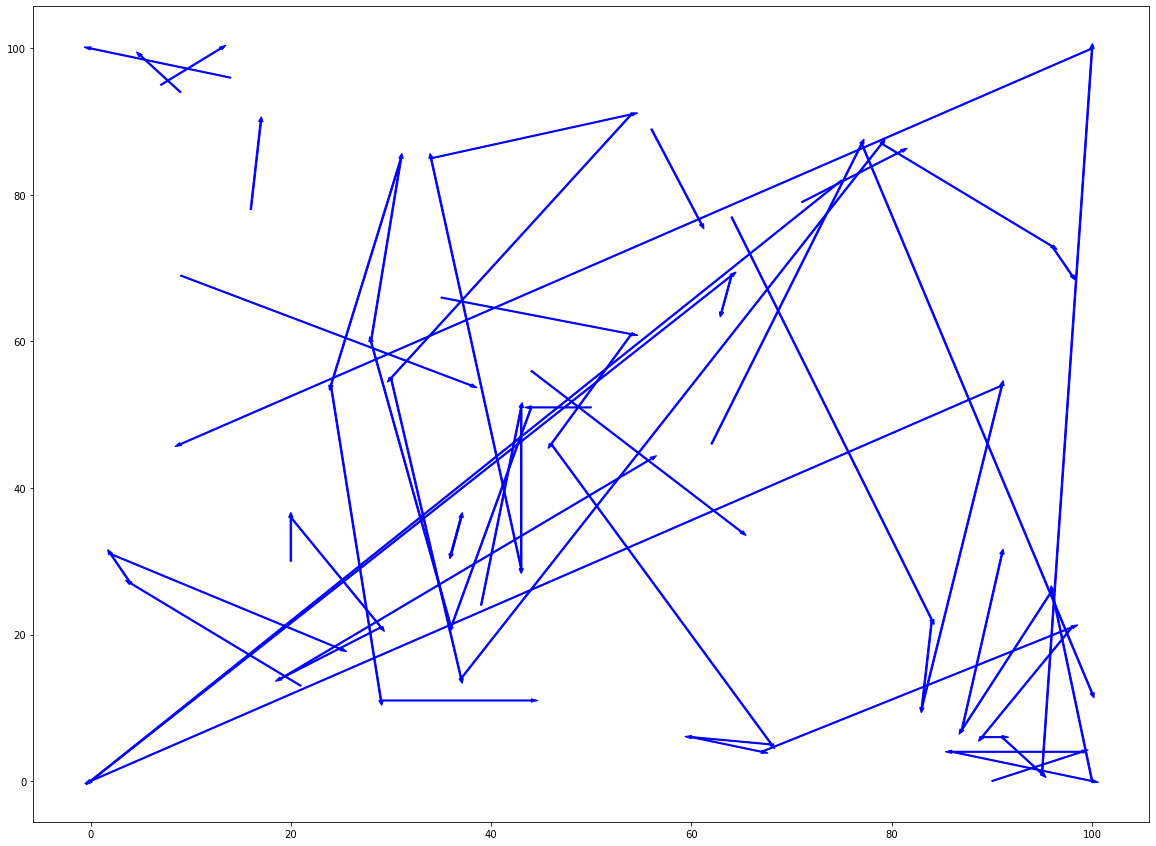

In [18]:
# Déplacement du ballon sur les 5 premières minutes de la première mi-temps
plt.figure(figsize=(20, 15))
for i, row in tiniest_match_event[(tiniest_match_event.matchperiod == '1H') &
                                  (tiniest_match_event.eventsec >= 0.) &
                                  (tiniest_match_event.eventsec < 300)].iterrows():
    plt.arrow(row['x_begin'], row['y_begin'], row['x_end'] - row['x_begin'], row['y_end'] - row['y_begin'], color='blue', width=.15)

## <a name="étude_lancement"></a> II - b. Équipe démarrant la mi-temps

In [5]:
team_A = tiniest_match_event[tiniest_match_event.matchperiod == '1H'].iloc[0]['club_id']
team_B = tiniest_match_event[tiniest_match_event.matchperiod == '2H'].iloc[0]['club_id']

print('Équipe démarrant la première mi-temps : ', team_A)
print('Équipe démarrant la seconde mi-temps : ', team_B)

Équipe démarrant la première mi-temps :  59
Équipe démarrant la seconde mi-temps :  6


## <a name="étude_possession"></a> II - c. Possession du ballon

> Problème à régler pour cette partie :
>  - il ne s'agit pas ici de compter le nombre d'évènement pour chaque équipe mais de déterminer le temps de possession du ballon (points d'attention sur les duels perdus et autres).

In [5]:
def Collect_infos(df):
    """
    Cette fonction permet de créé une ligne, à insérée dans la table « ??? » (en cours d'élaboration),
    qui contient des informations extraites à partir des événements d'un match particulier de la table
    « match_event ».
    
    Argument :
     - df : les données de la table « match_event » correspondant à un match particulier.
    
    Prérequis : « df » doit être trié sur les colonnes « matchperiod » et « eventsec » (ordre croissant).
    """
    dico_meta          = {} # Stockage des données équipe et poste de chaque joueur
    dico_infos         = {}
    dico_previousEvent = {}
    
    # Initialisation
    for player in df.players_id.unique():
        # Récupération de l'équipe et du poste de chaque joueur
        dico_meta[player] = list(df[df.players_id == player][['club_id', 'position']].iloc[0])
        
        # Initialisation des informations des joueurs
        for half in ['1H', '2H']:
            for t in ['Possession']:
                dico_infos['_'.join([t, str(player), half])] = 0.
    
    # Début du calcul
    for half in ['1H', '2H']:
        # Initialisation
        dico_previousEvent['eventsec'] = 0.
        
        # Début de la collecte des informations
        for i, row in df[df['matchperiod'] == half].iterrows():
            player = str(row['players_id'])
            
            # Incrément du temps de possession de la balle pour le joueur
            # TODO: certains événement ne sont pas à prendre en compte
            dico_infos['_'.join(['Possession', player, half])] += row['eventsec'] - dico_previousEvent['eventsec']
            
            # Actualisation avant passage à l'événement suivant
            dico_previousEvent['eventsec'] = row['eventsec']
    
    # Envoie des informations
    return dico_meta, pd.DataFrame(data=dico_infos, index=[0])

In [14]:
def Aggregate_infos(match_id, meta_infos, infos, n_index=0):
    """
    TODO
    """
    results1,           results2           = dict(), dict()
    results1['Équipe'], results2['Équipe'] = None, None
    results1['Match'],  results2['Match']  = None, None
    
    for half in ['1H', '2H']:
        for t in ['Équipe', 'Attaquants', 'Milieux', 'Défenseurs', 'Gardiens']:
            results1['Possession_' + t + '_' + half] = None
            results2['Possession_' + t + '_' + half] = None
    
    team1,               team2               = dict(), dict()
    team1['Équipe'],     team2['Équipe']     = list(set([arr[0] for arr in meta_infos.values()]))
    team1['Tous'],       team2['Tous']       = list(), list()
    team1['Attaquants'], team2['Attaquants'] = list(), list()
    team1['Milieux'],    team2['Milieux']    = list(), list()
    team1['Défenseurs'], team2['Défenseurs'] = list(), list()
    team1['Gardiens'],   team2['Gardiens']   = list(), list()
    
    # Traitement des méta-informations
    for player in meta_infos:
        # Récupération des informations sur le joueur courant (équipe + poste)
        team, pos = meta_infos[player]
        
        # Regroupement des informations
        ptr_team = team1 if team == team1['Équipe'] else team2
        if pos == 'Forward':
            ptr_team['Tous'].append(player)
            ptr_team['Attaquants'].append(player)
        elif pos == 'Midfielder':
            ptr_team['Tous'].append(player)
            ptr_team['Milieux'].append(player)
        elif pos == 'Defender':
            ptr_team['Tous'].append(player)
            ptr_team['Défenseurs'].append(player)
        elif pos == 'Goalkeeper':
            ptr_team['Tous'].append(player)
            ptr_team['Gardiens'].append(player)
    
    # Identifiants équipes + match
    results1['Équipe'], results2['Équipe'] = team1['Équipe'], team2['Équipe']
    results1['Match'],  results2['Match']  = match_id,        match_id
    
    for ptr_res, ptr_team in zip([results1, results2], [team1, team2]):
        ## Agrégation des informations pour la première équipe
        for half in ['1H', '2H']:

            # Calcul du total afin de calculer les pourcentages
            pattern = '^Possession_' + ''.join(map(lambda x: '(' + str(x) + ')?', ptr_team['Tous'])) + '_' + half + '$'
            tot = infos.filter(regex=pattern, axis=1).sum().sum()

            # Calcul du pourcentage de possession pour l'équipe
            pattern = '^Possession_' + ''.join(map(lambda x: '(' + str(x) + ')?', team1['Tous'] + team2['Tous'])) + '_' + half + '$'
            ptr_res['Possession_Équipe_' + half] = round(tot / infos.filter(regex=pattern, axis=1).sum().sum() * 100., 2)

            # Boucle sur les différents postes
            for t in ['Attaquants', 'Milieux', 'Défenseurs', 'Gardiens']:
                ## Traitement des informations concernant la possession
                pattern = '^Possession_' + ''.join(map(lambda x: '(' + str(x) + ')?', ptr_team[t])) + '_' + half + '$'
                ptr_res['Possession_' + t + '_' + half] = round(infos.filter(regex=pattern, axis=1).sum().sum() / tot * 100., 2)
    
    # Envoie du prochain numéro d'index + les 2 lignes de résultats dans un DataFrame
    return n_index + 2, pd.concat([pd.DataFrame(data=results1, index=[n_index]), pd.DataFrame(data=results2, index=[n_index + 1])], axis=0)

In [15]:
test = Aggregate_infos(tiniest_match_id, test1, test2)
test

,Équipe,Match,Possession_Équipe_1H,Possession_Attaquants_1H,Possession_Milieux_1H,Possession_Défenseurs_1H,Possession_Gardiens_1H,Possession_Équipe_2H,Possession_Attaquants_2H,Possession_Milieux_2H,Possession_Défenseurs_2H,Possession_Gardiens_2H
0,59,985,50.1,1.92,42.62,30.33,25.13,50.59,2.40,31.57,28.58,37.45
1,6,985,49.9,16.57,13.91,59.68,9.84,49.41,8.46,20.20,63.68,7.66


In [12]:
test1, test2 = Collect_infos(tiniest_match_event.sort_values(['matchperiod', 'eventsec']))

In [9]:
print(test1)
test2.filter(regex='^Possession_1739', axis=1)

{311: [59, 'Forward'], 1314: [59, 'Midfielder'], 389: [59, 'Midfielder'], 403: [59, 'Defender'], 216: [59, 'Defender'], 257: [59, 'Midfielder'], 1242: [6, 'Forward'], 1460: [59, 'Midfielder'], 71: [59, 'Defender'], 2162: [6, 'Defender'], 3234: [6, 'Defender'], 161: [59, 'Midfielder'], 1839: [6, 'Midfielder'], 442: [6, 'Midfielder'], 282: [6, 'Midfielder'], 287: [6, 'Forward'], 378: [6, 'Forward'], 359: [6, 'Defender'], 1739: [59, 'Goalkeeper'], 2065: [59, 'Defender'], 150: [6, 'Goalkeeper'], 1673: [6, 'Defender'], 304: [59, 'Defender'], 3217: [6, 'Midfielder'], 2215: [6, 'Midfielder'], 3235: [59, 'Forward'], 575: [59, 'Defender']}


,Possession_1739_1H,Possession_1739_2H
0,340.134425,555.993187


In [67]:
print(len(tiniest_match_event[tiniest_match_event.players_id == 1739]))
tiniest_match_event[tiniest_match_event.players_id == 1739]

39


,id,club_id,match_id,players_id,matchperiod,eventsec,eventname,action,modifier,x_begin,y_begin,x_end,y_end,is_success,position
328439,2182643,59,985,1739,1H,229.930133,Free Kick,Goal kick,NaN,0,0,64.0,69.0,NaN,Goalkeeper
2101129,2182654,59,985,1739,1H,368.498524,Free Kick,Free Kick,NaN,28,76,66.0,13.0,t,Goalkeeper
2270374,2182660,59,985,1739,1H,381.004081,Pass,Launch,NaN,22,35,69.0,28.0,t,Goalkeeper
261019,2182790,59,985,1739,1H,924.864307,Free Kick,Goal kick,NaN,0,0,19.0,12.0,NaN,Goalkeeper
270561,2182841,59,985,1739,1H,1115.576716,Free Kick,Goal kick,NaN,0,0,33.0,75.0,NaN,Goalkeeper
2388606,2182903,59,985,1739,1H,1446.686215,Free Kick,Free Kick,NaN,9,8,66.0,43.0,t,Goalkeeper
328445,2182935,59,985,1739,1H,1575.226649,Free Kick,Goal kick,NaN,0,0,59.0,33.0,NaN,Goalkeeper
2270415,2182964,59,985,1739,1H,1689.414696,Pass,High pass,NaN,6,50,33.0,13.0,t,Goalkeeper
2388633,2183088,59,985,1739,1H,2214.503330,Pass,High pass,NaN,6,42,34.0,100.0,t,Goalkeeper
261024,2183094,59,985,1739,1H,2263.064510,Free Kick,Goal kick,NaN,0,0,61.0,86.0,NaN,Goalkeeper


In [8]:
print(test2.filter(regex='^Possession.*1H$', axis=1).sum().sum(), 45 * 60)
print(test2.filter(regex='^Possession.*2H$', axis=1).sum().sum(), 45 * 60)

2701.519719 2700
2934.403028 2700


In [37]:
(2934 - 2700) // 60, (2934 - 2700) % 60

(3, 54)

In [7]:
tiniest_match_event.head(30)

,id,club_id,match_id,players_id,matchperiod,eventsec,eventname,action,modifier,x_begin,y_begin,x_end,y_end,is_success,position
2388562,2182590,59,985,311,1H,2.128856,Pass,Simple pass,NaN,50,51,44.0,51.0,t,Forward
2270363,2182591,59,985,1314,1H,3.002507,Pass,Simple pass,NaN,44,51,36.0,21.0,t,Midfielder
2432461,2182592,59,985,389,1H,7.444523,Pass,Simple pass,NaN,36,21,28.0,60.0,t,Midfielder
2101120,2182593,59,985,403,1H,11.951888,Pass,Simple pass,NaN,28,60,31.0,85.0,t,Defender
2388563,2182594,59,985,216,1H,14.070343,Pass,Simple pass,NaN,31,85,24.0,54.0,t,Defender
2270364,2182595,59,985,403,1H,17.832804,Pass,Simple pass,NaN,24,54,29.0,11.0,t,Defender
2432462,2182596,59,985,257,1H,20.337699,Pass,Simple pass,NaN,29,11,44.0,11.0,t,Midfielder
1251743,2182597,6,985,1242,1H,22.014833,Duel,Ground loose ball duel,lost,56,89,61.0,76.0,f,Forward
2101121,2182599,59,985,389,1H,22.512077,Pass,Simple pass,NaN,39,24,43.0,51.0,t,Midfielder
2388564,2182600,59,985,1460,1H,24.068216,Pass,Simple pass,NaN,43,51,43.0,29.0,t,Midfielder


## <a name="étude_stats"></a> II - d. Statistiques par joueur

> On va s'intéresser ici aux statistiques des joueurs de chaque équipe. Les statistiques observées varieront en fonction du poste du joueurs :
>  - attaquant (<i>Forward</i>) ;
>  - milieu (<i>Midfielder</i>) ;
>  - défenseur (<i>Defender</i>) ;
>  - gardien (<i>Goalkeeper</i>).

> 0. [Statistiques communes à tous les joueurs](#stats_communes)
> - nombre de fautes ;
> - carton jaune ;
> - carton rouge.

> 1. [Statistiques regardées pour les attaquants](#stats_forward)
> - nombre de passes ;
> - pourcentage de passes réussies ;
> - nombre de duels ;
> - pourcentage de duels gagnés.

> 2. [Statistiques regardées pour les milieux](#stats_midfielder)
> - nombre de passes ;
> - pourcentage de passes réussies ;
> - nombre de duels ;
> - pourcentage de duels gagnés.

> 3. [Statistiques regardées pour les défenseurs](#stats_defender)
> - nombre de passes ;
> - pourcentage de passes réussies ;
> - nombre de duels ;
> - pourcentage de duels gagnés.

> 4. [Statistiques regardées pour les gardiens](#stats_goalkeeper)
> - nombre de buts sauvés ;
> - nombre de buts encaissés.


In [7]:
## Calcul du nombre d'actions effectuées par chaque joueur
players_actions = pd.DataFrame(tiniest_match_event.groupby(by=['club_id', 'players_id', 'position']).size()).sort_values(by=['club_id', 'position', 'players_id']).rename(columns={0: "Nombre d'actions"})

# Affichage
players_actions

Nombre d'actions
club_id players_id position                    
6       359        Defender                  76
        1673       Defender                  55
        2162       Defender                  84
        3234       Defender                  77
        287        Forward                   55
        378        Forward                   39
        1242       Forward                   39
        150        Goalkeeper                25
        282        Midfielder                72
        442        Midfielder                54
        1839       Midfielder                21
        2215       Midfielder                20
        3217       Midfielder                29
59      71         Defender                  58
        216        Defender                  37
        304        Defender                  12
        403        Defender                  47
        575        Defender                   4
        2065       Defender                  63
        311        Forward                   48
        3235       Forward                    5
        1739       Goalkeeper                39
        161        Midfielder                36
        257        Midfielder                54
        389        Midfielder                31
        1314       Midfielder                62
        1460       Midfielder                50

In [1]:
def ActionsPie(df, label, val):
    """
    """
    # Partie calculs des données
    team1, team2 = list(players_actions.reset_index().club_id.unique()) # Récupération de l'identifiant des 2 équipes
    data1 = {}
    data2 = {}
    for i, row in players_actions.reset_index().iterrows():
        if row.club_id == team1:
            if row.position in data1:
                data1[row[label]] += row[val]
            else:
                data1[row[label]] = row[val]
        else:
            if row.position in data2:
                data2[row[label]] += row[val]
            else:
                data2[row[label]] = row[val]
    
    # Partie affichage
    fig = plt.figure(figsize=(25, 10))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    wedges, texts, autotexts = ax1.pie(data1.values(), autopct=lambda pct: "{} %".format(round(pct, 2)), textprops=dict(color='w'))
    ax1.legend(wedges, data1.keys(), title='Poste', loc='upper right')

    wedges, texts, autotexts = ax2.pie(data2.values(), autopct=lambda pct: "{} %".format(round(pct, 2)), textprops=dict(color='w'))
    ax2.legend(wedges, data2.keys(), title='Poste', loc='upper right')

    ax1.set_title('Équipe ' + str(team1))
    ax2.set_title('Équipe ' + str(team2));

### <a name="stats_communes"></a> II - d.0. Statistiques communes à tous les joueurs

> Rappel des éléments à calculer :
> - nombre de fautes ;
> - carton jaune ;
> - carton rouge.

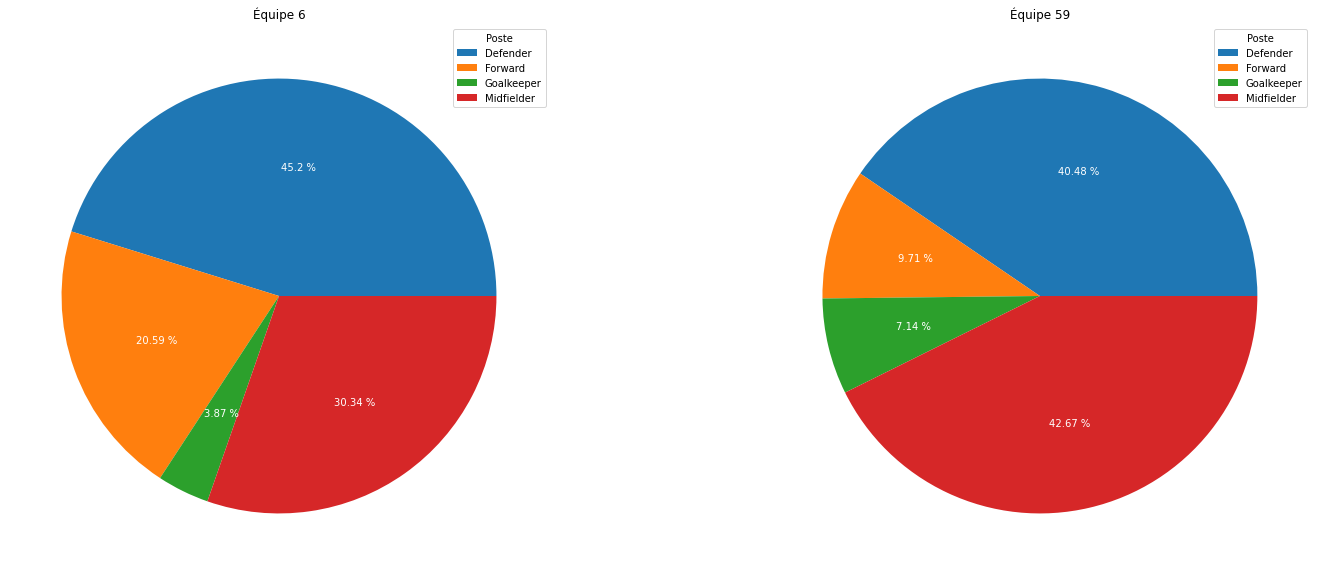

In [9]:
# Proportion des actions dans laquelle chaque poste est impliqué
ActionsPie(players_actions, 'position', "Nombre d'actions")

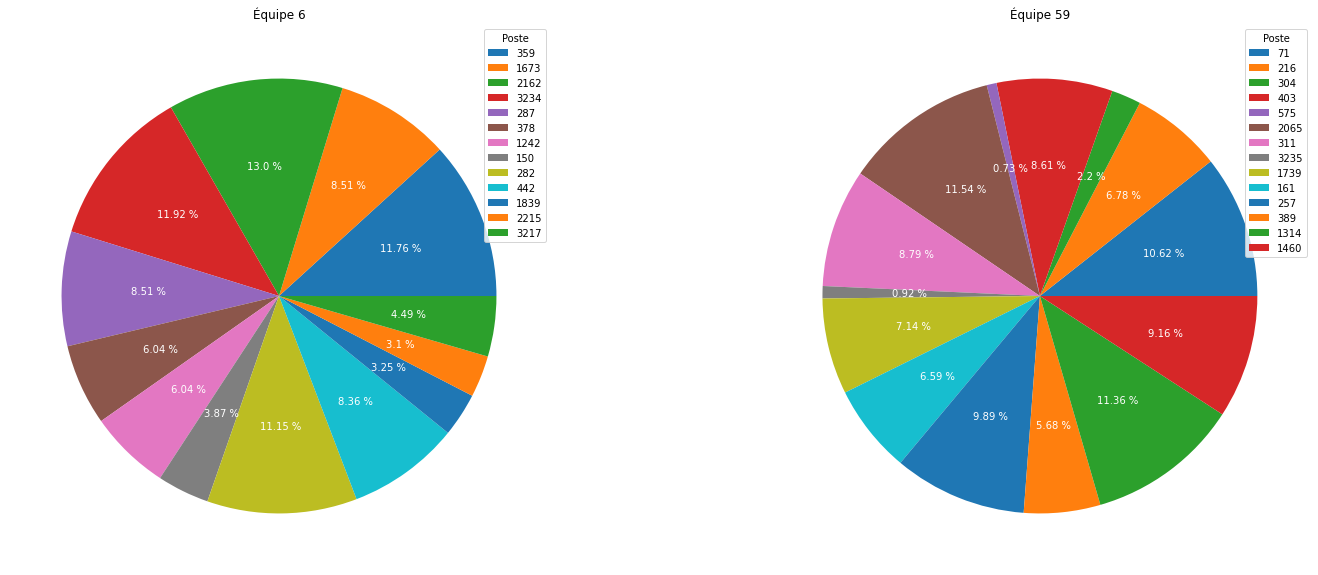

In [10]:
# Proportion des actions dans laquelle chaque joueur est impliqué
ActionsPie(players_actions, 'players_id', "Nombre d'actions")

### <a name="stats_forward"></a> II - d.1. Statistiques regardées pour les attaquants

> Rappel des éléments à calculer :
> - nombre de passes ;
> - pourcentage de passes réussies ;
> - nombre de duels ;
> - pourcentage de duels gagnés.

### <a name="stats_midfielder"></a> II - d.2. Statistiques regardées pour les milieux

> Rappel des éléments à calculer :
> - nombre de passes ;
> - pourcentage de passes réussies ;
> - nombre de duels ;
> - pourcentage de duels gagnés.

### <a name="stats_defender"></a> II - d.3. Statistiques regardées pour les défenseurs

> Rappel des éléments à calculer :
> - nombre de passes ;
> - pourcentage de passes réussies ;
> - nombre de duels ;
> - pourcentage de duels gagnés.

### <a name="stats_goalkeeper"></a> II - d.4. Statistiques regardées pour les gardiens

> Rappel des éléments à calculer :
> - nombre de buts sauvés ;
> - nombre de buts encaissés.

### <a name="étude_stats_postes"></a> II - e. Statistiques globales au niveau poste

### <a name="étude_stats_équipe"></a> II - f. Statistiques globales au niveau équipe

> - temps de jeu pour chaque joueur ;
>   + permettra aussi de calculé le temps joué (pour chaque joueur) dans les <i>n</i> derniers matchs quand ils sont gagnés ;
>   + permettra aussi de calculé le temps joué (pour chaque joueur) dans les <i>n</i> derniers matchs quand ils sont perdus ;
>   > les deux propositions ci-dessus seront à mettre en lien avec les joueurs alignés pour le match à évalué !
>
> - détermination de la composition de l'équipe ;

> Problèmes à résoudre :
>  - comment déterminer le changement de joueurs ?